<a href="https://colab.research.google.com/github/basangoudapatil/Credit_card_analysis/blob/main/Credit_card_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('/content/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df['Class'].unique()

array([0, 1])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.shape

(284807, 31)

In [6]:
df['Time'].value_counts()

163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
127750.0     1
62260.0      1
62259.0      1
127753.0     1
172792.0     1
Name: Time, Length: 124592, dtype: int64

In [7]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

This is an imbalanced learning problem i.e., Class-0 makes 99.8272%.

<AxesSubplot:title={'center':'Count-Class'}>

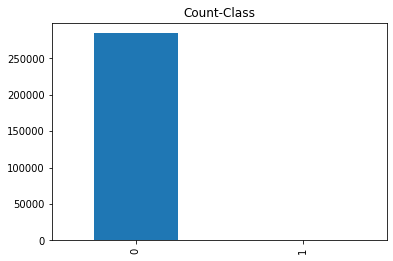

In [8]:
target_count=df['Class'].value_counts()
target_count.plot(kind='bar', title='Count-Class')

In [9]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<AxesSubplot:>

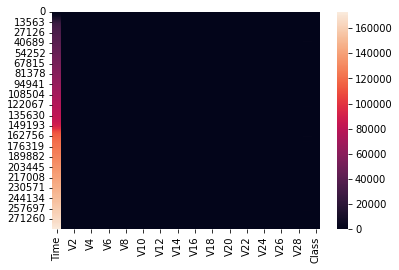

In [10]:
import seaborn as sns
sns.heatmap(data=df)

In [11]:
import imblearn
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split

X=df.drop(['Class'], axis =1)
y=df['Class']

smt=SMOTEENN(sampling_strategy='all')
X_smt, y_smt = smt.fit_resample(X,y)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_smt, y_smt, test_size=0.3)

In [13]:
X_train.shape, y_train.shape

((378776, 30), (378776,))

In [14]:
y_test.shape

(162333,)

In [15]:
X_test.shape

(162333, 30)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr=LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
y_pred=lr.predict(X_test)

In [18]:
y_pred[0:5]

array([1, 1, 1, 0, 1])

In [19]:
df1=pd.DataFrame(list(zip(y_pred,y_test)), columns=['Predicted','Actual'])
df1.head()

,Predicted,Actual
0,1,1
1,1,1
2,1,1
3,0,0
4,1,1


In [20]:
lr.score(X_test, y_test)

0.9732155507506176

In [21]:
lr.score(X_test, y_test)

0.9732155507506176

In [22]:
print("AUROC score in % : ",(roc_auc_score(y_test, y_pred))*100)

AUROC score in % :  97.33883575059333
